In [1]:
from ioMicro import *

In [1]:
from Human.workerScope3A_HttHuman_Snonia__06_12_2023_P2G1_V2 import *

In [5]:
def compute_drift(save_folder,fov,all_flds,set_,redo=False,gpu=False):
    """
    save_folder where to save analyzed data
    fov - i.e. Conv_zscan_005.zarr
    all_flds - folders that contain eithger the MERFISH bits or control bits or smFISH
    set_ - an extra tag typically at the end of the folder to separate out different folders
    """
    #print(len(all_flds))
    #print(all_flds)
    
    # defulat name of the drift file 
    drift_fl = save_folder+os.sep+'driftNew_'+fov.split('.')[0]+'--'+set_+'.pkl'
    
    iiref = None
    fl_ref = None
    previous_drift = {}
    if not os.path.exists(drift_fl) or redo:
        redo = True
    else:
        try:
            drifts_,all_flds_,fov_,fl_ref = pickle.load(open(drift_fl,'rb'))
            all_tags_ = np.array([os.path.basename(fld)for fld in all_flds_])
            all_tags = np.array([os.path.basename(fld)for fld in all_flds])
            iiref = np.argmin([np.sum(np.abs(drift[0]))for drift in drifts_])
            previous_drift = {tag:drift for drift,tag in zip(drifts_,all_tags_)}

            if not (len(all_tags_)==len(all_tags)):
                redo = True
            else:
                if not np.all(np.sort(all_tags_)==np.sort(all_tags)):
                    redo = True
        except:
            os.remove(drift_fl)
            redo=True
    if redo:
        fls = [fld+os.sep+fov for fld in all_flds]
        if fl_ref is None:
            fl_ref = fls[len(fls)//2]
        obj = None
        newdrifts = []
        all_fldsT = []
        for fl in tqdm(fls):
            fld = os.path.dirname(fl)
            tag = os.path.basename(fld)
            new_drift_info = previous_drift.get(tag,None)
            if new_drift_info is None:
                if obj is None:
                    obj = fine_drift(fl_ref,fl,sz_block=600)
                else:
                    obj.get_drift(fl_ref,fl)
                new_drift = -(obj.drft_minus+obj.drft_plus)/2
                new_drift_info = [new_drift,obj.drft_minus,obj.drft_plus,obj.drift,obj.pair_minus,obj.pair_plus]
            newdrifts.append(new_drift_info)
            all_fldsT.append(fld)
            pickle.dump([newdrifts,all_fldsT,fov,fl_ref],open(drift_fl,'wb'))

In [6]:
set_ = '_set5'
save_folder,all_flds,fov = get_files((set_,30))
compute_drift(save_folder,fov,all_flds,set_,redo=False,gpu=False)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H31_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H25_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.28it/s]


Finding rough drift...


  8%|██████▉                                                                            | 1/12 [00:38<07:07, 38.88s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H26_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.19it/s]


Finding rough drift...


 17%|█████████████▊                                                                     | 2/12 [01:02<04:58, 29.88s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H27_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.39it/s]


Finding rough drift...


 25%|████████████████████▊                                                              | 3/12 [01:24<03:58, 26.48s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H28_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.14it/s]


Finding rough drift...


 33%|███████████████████████████▋                                                       | 4/12 [01:47<03:20, 25.11s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H29_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


 42%|██████████████████████████████████▌                                                | 5/12 [02:13<02:56, 25.27s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H30_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.36it/s]


Finding rough drift...


 50%|█████████████████████████████████████████▌                                         | 6/12 [02:37<02:28, 24.76s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H31_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.42it/s]


Finding rough drift...


 58%|████████████████████████████████████████████████▍                                  | 7/12 [03:01<02:02, 24.48s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H32_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.15it/s]


Finding rough drift...


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [03:26<01:38, 24.70s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H33_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.05it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.38it/s]


Finding rough drift...


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [03:49<01:12, 24.33s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H34_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.37it/s]


Finding rough drift...


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [04:13<00:48, 24.09s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H35_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.33it/s]


Finding rough drift...


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [04:37<00:24, 24.22s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H36_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.13it/s]


Finding rough drift...


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [05:02<00:00, 25.21s/it]

Finding fine drift...


In [5]:

fov,set_ = 'Conv_zscan__30','_set5'
dec = decoder_simple(save_folder,fov=fov,set_=set_)

drfits,flds,fov_ = np.load(dec.drift_fl,allow_pickle=True)


fls = [fld+os.sep+fov_ for fld in flds]
fl_ref = [fld+os.sep+fov_ for fld,(drft,_) in zip(flds,drfits) if np.sum(drft)==0][0]

obj = None
newdrifts = []
for fl in tqdm(fls):
    if obj is None:
        obj = fine_drift(fl_ref,fl)
    else:
        obj.get_drift(fl_ref,fl)
    new_drift = -(obj.drft_minus+obj.drft_plus)/2
    newdrifts.append([new_drift,obj.drft_minus,obj.drft_plus,obj.drift,obj.pair_minus,obj.pair_plus])
    
drift_fl_new = dec.drift_fl.replace('drift_','driftNew_')
pickle.dump([newdrifts,flds,fov_],open(drift_fl_new,'wb'))

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H31_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.15it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.43it/s]


Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H25_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.06it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.18it/s]


Finding rough drift...


  8%|██████▉                                                                            | 1/12 [00:39<07:10, 39.14s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H26_MER2col__set5\Conv_zscan__30.zarr
Finding markers...



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  7.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.40it/s]


Finding rough drift...


 17%|█████████████▊                                                                     | 2/12 [01:03<05:03, 30.32s/it]

Finding fine drift...
Loading: \\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\H27_MER2col__set5\Conv_zscan__30.zarr


 17%|█████████████▊                                                                     | 2/12 [01:05<05:29, 32.95s/it]


KeyboardInterrupt: 

In [4]:
newdrifts

[[array([ 2.14350721, -3.23745714, 13.3923728 ]),
  array([ -2.18881585,   3.31409031, -13.37976477]),
  array([ -2.09819858,   3.16082398, -13.40498083]),
  (array([ -2,   3, -13]),
   [array([ -2,   3, -13], dtype=int64),
    array([ -2,   3, -13], dtype=int64),
    array([ -2,   3, -13], dtype=int64),
    array([ -2,   3, -13], dtype=int64),
    array([ -2,   3, -13], dtype=int64)]),
  [array([[8.40821905e+00, 1.27687556e+03, 2.02194526e+03],
          [7.87129630e+00, 2.22499472e+03, 2.91780432e+03],
          [9.04161976e+00, 7.25836852e+02, 7.68153038e+02],
          [9.22473495e+00, 1.30897723e+03, 2.09717393e+03],
          [9.30883347e+00, 1.31406160e+03, 2.02889236e+03],
          [9.36031098e+00, 1.71201272e+03, 2.67895147e+03],
          [9.45933788e+00, 2.07898212e+03, 1.15899911e+03],
          [9.14669696e+00, 2.18477833e+03, 2.96105344e+03],
          [9.00811049e+00, 2.27203048e+03, 2.90692761e+03],
          [1.02846057e+01, 2.33808653e+00, 2.23310512e+03],
          

In [123]:
fov,set_ = 'Conv_zscan__30','_set5'
dec = decoder_simple(save_folder,fov=fov,set_=set_)
dec.get_XH(fov,set_,ncols=2,nbits=12)#number of colors match 
dec.XH = dec.XH[dec.XH[:,-4]>0.25] ### keep the spots that are correlated with the expected PSF for 60X
dec.load_library(lib_fl,nblanks=-1)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.30it/s]


In [124]:
import torch
def get_inters(self,nmin_bits=4,dinstance_th=2,enforce_color=True,redo=False):
    """Get an initial intersection of points and save in self.res"""
    self.res_fl = self.decoded_fl.replace('decoded','res')
    if not os.path.exists(self.res_fl) or redo:
        
        res =[]
        if enforce_color:
            icols = self.XH[:,-2].astype(int)
            XH = self.XH
            for icol in tqdm(np.unique(icols)):
                inds = np.where(icols==icol)[0]
                Xs = XH[inds,:3]
                Ts = cKDTree(Xs)
                res_ = Ts.query_ball_tree(Ts,dinstance_th)
                res += [inds[r] for r in res_]
        else:
            XH = self.XH
            Xs = XH[:,:3]
            Ts = cKDTree(Xs)
            res = Ts.query_ball_tree(Ts,dinstance_th)
        print("Calculating lengths of clusters...")
        lens = np.array(list(map(len,res)))
        Mlen = np.max(lens)
        print("Unfolding indexes...")
        res_unfolder = np.concatenate(res)
        print("Saving to file:",self.res_fl)
        self.res_unfolder=res_unfolder
        self.lens=lens
        np.savez(self.res_fl,res_unfolder=res_unfolder,lens=lens)
    else:
        dic = np.load(self.res_fl)
        self.res_unfolder=dic['res_unfolder']
        self.lens=dic['lens']
        #self.res = res
    lens =self.lens
    self.res_unfolder = self.res_unfolder[np.repeat(lens, lens)>=nmin_bits]
    self.lens = self.lens[lens>=nmin_bits]

In [125]:
get_inters(dec,dinstance_th=2,nmin_bits=4,enforce_color=True,redo=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:28<00:00, 44.39s/it]


Calculating lengths of clusters...
Unfolding indexes...
Saving to file: \\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group3\res_Conv_zscan__30--_set5.npz


In [152]:
def get_icodes(dec,nmin_bits=4,delta_bits=None,iH=-3,redo=False,norm_brightness=False,nbits=24,is_unique=False):
    import time
    start = time.time()
    lens = dec.lens
    res_unfolder = dec.res_unfolder
    Mlen = np.max(lens)
    print("Calculating indexes within cluster...")
    res_is = np.tile(np.arange(Mlen), len(lens))
    res_is = res_is[res_is < np.repeat(lens, Mlen)]
    print("Calculating index of molecule...")
    ires = np.repeat(np.arange(len(lens)), lens)
    #r0 = np.array([r[0] for r in res for r_ in r])
    print("Calculating index of first molecule...")
    r0i = np.concatenate([[0],np.cumsum(lens)])[:-1]
    r0 = res_unfolder[np.repeat(r0i, lens)]
    print("Total time unfolded molecules:",time.time()-start)

    ### torch
    ires = torch.from_numpy(ires.astype(np.int64))
    res_unfolder = torch.from_numpy(res_unfolder.astype(np.int64))
    res_is = torch.from_numpy(res_is.astype(np.int64))
    
    
    
    ### get score for brightness 
    def get_scoresH():
        H = torch.from_numpy(dec.XH[:,-3])
        Hlog = H#np.log(H)
        mnH = Hlog.mean()
        stdH = Hlog.std()
        distribution = torch.distributions.Normal(mnH, stdH)
        scoreH = distribution.cdf(Hlog)
        return scoreH[res_unfolder]
    ### get score for inter-distance between molecules
    def get_scoresD():
        X = dec.XH[:,:3]
        XT = torch.from_numpy(X)
        XD = XT[res_unfolder]-XT[r0]
        meanD = -torch.mean(torch.abs(XD),axis=-1)
        distribution = torch.distributions.Normal(meanD.mean(), meanD.std())
        scoreD = distribution.cdf(meanD)
        return scoreD
    def get_combined_scores():
        scoreH = get_scoresH()
        scoreD = get_scoresD()
        ### combine scores. Note this score is for all the molecules un-ravelled from their clusters
        scoreF = scoreD*scoreH
        return scoreF
    
    import time
    start = time.time()
    print("Computing score...")
    if iH is None:
        scoreF = get_combined_scores()
    else:
        scoreF = torch.from_numpy(dec.XH[:,iH])[res_unfolder]
    print("Total time computing score:",time.time()-start)

    ### organize molecules in blocks for each cluster
    def get_asort_scores():
        val = torch.max(scoreF)+2
        scoreClu = torch.zeros([len(lens),Mlen],dtype=torch.float64)+val
        scoreClu[ires,res_is]=scoreF
        asort = scoreClu.argsort(-1)
        scoreClu = torch.gather(scoreClu,dim=-1,index=asort)
        scoresF2 = scoreClu[scoreClu<val-1]
        return asort,scoresF2
    def get_reorder(x,val=-1):
        if type(x) is not torch.Tensor:
            x = torch.from_numpy(np.array(x))
        xClu = torch.zeros([len(lens),Mlen],dtype=x.dtype)+val
        xClu[ires,res_is] = x
        xClu = torch.gather(xClu,dim=-1,index=asort)
        xf = xClu[xClu>val]
        return xf

    import time
    start = time.time()
    print("Computing sorting...")
    asort,scoresF2 = get_asort_scores()
    res_unfolder2 = get_reorder(res_unfolder,val=-1)
    del asort
    del scoreF
    print("Total time sorting molecules by score:",time.time()-start)
    
    
    
    import time
    start = time.time()
    print("Finding best bits per molecules...")

    Rs = dec.XH[:,-1].astype(np.int64)
    Rs = torch.from_numpy(Rs)
    Rs_U = Rs[res_unfolder2]

    score_bits = torch.zeros([len(lens),nbits],dtype=scoresF2.dtype)-1
    score_bits[ires,Rs_U]=scoresF2

    
    codes_lib = torch.from_numpy(np.array(dec.codes__))
    codes_lib_01 = torch.zeros([len(codes_lib),nbits],dtype=score_bits.dtype)
    for icd,cd in enumerate(codes_lib):
        codes_lib_01[icd,cd]=1

    print("Finding best code...")
    batch = 10000
    icodes_best = torch.zeros(len(score_bits),dtype=torch.int64)
    for i in tqdm(range((len(score_bits)//batch)+1)):
        score_bits_ = score_bits[i*batch:(i+1)*batch]
        if len(score_bits_)>0:
            icodes_best[i*batch:(i+1)*batch] = torch.argmax(torch.matmul(score_bits_,codes_lib_01.T),dim=-1)
    
    
    #argsort_bits = torch.argsort(score_bits,dim=-1,descending=True)[:,:(nmin_bits+delta_bits)]
    dec.score_bits = score_bits
    dec.codes_lib = codes_lib
    dec.icodes_best = icodes_best
    
    if delta_bits is not None:
        argsort_bits = torch.argsort(score_bits,dim=-1,descending=True)[:,:(nmin_bits+delta_bits)]
        score_bits_ = score_bits*0
        score_bits_.scatter_(1, argsort_bits, 1)
        keep_all_bits = torch.all(score_bits_.gather(1,codes_lib[icodes_best])>0.5,-1)
    else:
        keep_all_bits = torch.all(score_bits.gather(1,codes_lib[icodes_best])>=0,-1)
        
    score_bits = score_bits[keep_all_bits]
    icodes_best_ = icodes_best[keep_all_bits]
    
    
    
    indexMols_ = torch.zeros([len(lens),nbits],dtype=res_unfolder2.dtype)-1
    indexMols_[ires,Rs_U]=res_unfolder2
    indexMols_ = indexMols_[keep_all_bits]
    indexMols_ = indexMols_.gather(1,codes_lib[icodes_best_])
    XH = torch.from_numpy(dec.XH)
    XH_pruned = XH[indexMols_]
    icodesN=icodes_best_
    dec.XH_pruned=XH_pruned.numpy()
    dec.icodesN=icodesN.numpy()

    print("Total time best bits per molecule:",time.time()-start)

In [198]:
get_icodes(dec,nmin_bits=4,delta_bits=None,iH=-3,redo=False,norm_brightness=False,nbits=24,is_unique=False)

Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 2.034428358078003
Computing score...
Total time computing score: 0.1135108470916748
Computing sorting...
Total time sorting molecules by score: 3.139979124069214
Finding best bits per molecules...
Finding best code...


100%|███████████████████████████████████████████████████████████████████████████████| 920/920 [00:05<00:00, 157.14it/s]


Total time best bits per molecule: 7.9308178424835205


In [208]:
X_ = dec.XH_pruned[:,:,:3]
d = np.linalg.norm(X_-X_.mean(1)[:,np.newaxis],axis=-1)
h = np.log(dec.XH_pruned[:,:,-3])
ibad = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn]
bad = np.in1d(dec.icodesN,ibad)
good = ~bad

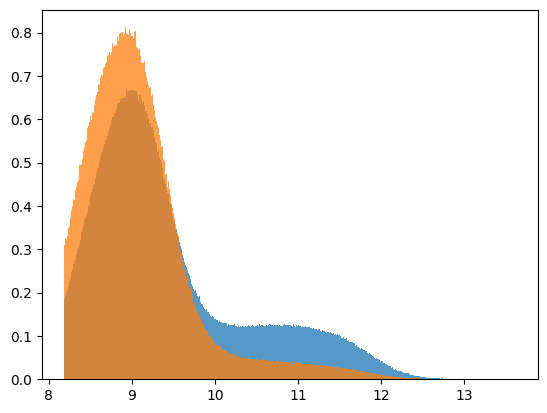

In [213]:
plt.hist(h[good].ravel(),density=True,alpha=0.75,bins=500);
plt.hist(h[bad].ravel(),density=True,alpha=0.75,bins=500);

In [251]:
stds = np.array([-np.std(d),np.std(h)])
start=np.array([np.percentile(d,99),np.percentile(h,1)])
t = 1.25
new_th = stds*t+start
keep_all = np.all(d<new_th[0],axis=-1)&np.all(h>new_th[1],axis=-1)
np.mean(keep_all[bad]),np.mean(keep_all[good]),np.sum(keep_all[good])/np.sum(keep_all[bad])

(0.05577234569615801, 0.2522338997260619, 18.63171926595572)

In [252]:
new_th

array([1.37175898, 9.35973688])

In [220]:
np.max(d)

2.8874174498431806

In [192]:
#plt.plot(dec.XH[::1000,-5],dec.XH[::1000,-3],'o')

In [217]:
np.exp(9.5)

13359.726829661873

3.37128938955701

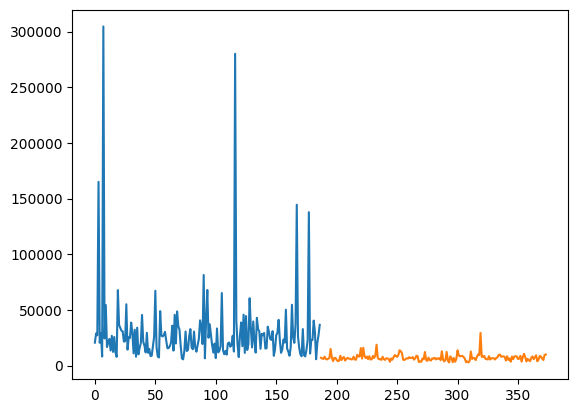

In [199]:
icds,ncts = np.unique(dec.icodesN,return_counts=True)

plt.plot(icds[good],ncts[good])
plt.plot(icds[bad],ncts[bad])
np.median(ncts[good])/np.median(ncts[bad])

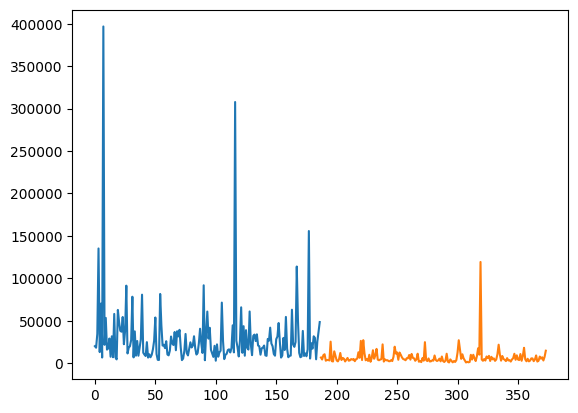

In [188]:
icds,ncts = np.unique(dec.icodesN,return_counts=True)
ibad = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn]
bad = np.in1d(icds,ibad)
good = ~bad
plt.plot(icds[good],ncts[good])
plt.plot(icds[bad],ncts[bad])

4.119726527414434

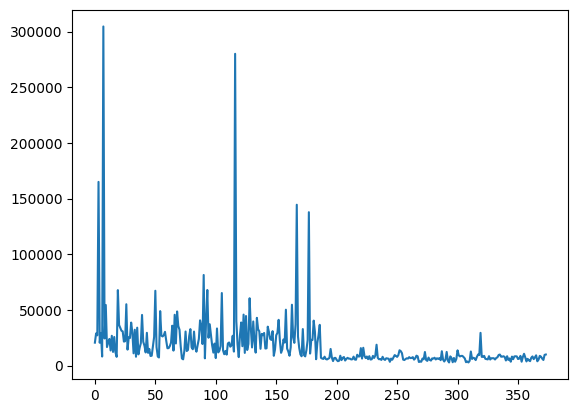

In [139]:
icds,ncts = np.unique(dec.icodesN,return_counts=True)
plt.plot(icds,ncts)

In [134]:
dec.XH_pruned

tensor([[[2.0000e+00, 3.9999e+00, 3.9505e+02,  ..., 4.1579e+03,
          0.0000e+00, 0.0000e+00],
         [2.8162e+00, 4.0924e+00, 3.9596e+02,  ..., 5.3426e+03,
          0.0000e+00, 6.0000e+00],
         [2.0000e+00, 4.2699e+00, 3.9700e+02,  ..., 4.2505e+03,
          0.0000e+00, 1.0000e+01],
         [1.9460e+00, 2.9935e+00, 3.9502e+02,  ..., 4.3182e+03,
          0.0000e+00, 1.2000e+01]],

        [[2.6651e+00, 1.8512e+02, 2.3302e+02,  ..., 6.4310e+03,
          0.0000e+00, 0.0000e+00],
         [1.8361e+00, 1.8510e+02, 2.3201e+02,  ..., 4.3202e+03,
          0.0000e+00, 2.0000e+00],
         [1.7773e+00, 1.8405e+02, 2.3304e+02,  ..., 5.2613e+03,
          0.0000e+00, 6.0000e+00],
         [2.0000e+00, 1.8514e+02, 2.3307e+02,  ..., 4.6356e+03,
          0.0000e+00, 1.8000e+01]],

        [[2.0000e+00, 3.9918e+02, 2.8014e+02,  ..., 7.8059e+03,
          0.0000e+00, 0.0000e+00],
         [1.0000e+00, 4.0014e+02, 2.7911e+02,  ..., 7.2972e+03,
          0.0000e+00, 2.0000e+00],
      

In [131]:
dec.icodesN.shape

torch.Size([6783054])

In [115]:
nbits = 24
codes_lib = torch.from_numpy(np.array(dec.codes__))
codes_lib_01 = torch.zeros([len(codes_lib),nbits],dtype=score_bits.dtype)
for icd,cd in enumerate(codes_lib):
    codes_lib_01[icd,cd]=1

In [116]:
torch.sum(codes_lib_01,axis=0)

tensor([91., 89., 89., 86., 75., 77., 74., 76., 72., 65., 70., 62., 69., 56.,
        55., 53., 49., 39., 48., 41., 42., 41., 42., 35.], dtype=torch.float64)

In [107]:
torch.max(icodes_best)

tensor(32)

In [102]:
score_bits = dec.score_bits
codes_lib = dec.codes_lib
icodes_best = dec.icodes_best

keep_all_bits = torch.all(score_bits.gather(1,codes_lib[icodes_best])>=0,-1)
torch.sum(keep_all_bits)

tensor(0)

In [99]:
score_bits[]

tensor([ 1.9563e+04, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00,  1.4897e+04, -1.0000e+00, -1.0000e+00,  1.8152e+04,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,  9.2767e+03,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         1.3659e+04, -1.0000e+00, -1.0000e+00], dtype=torch.float64)

In [82]:
#dec.codes_lib#[dec.icodes_best]
#dec.score_bits

In [83]:
#dec.icodes_best

In [84]:
#dec.codes_lib[dec.icodes_best]

Calculating indexes within cluster...
Calculating index of molecule...
Calculating index of first molecule...
Total time unfolded molecules: 2.615692377090454
Computing score...
Total time computing score: 0.13216876983642578
Computing sorting...
Total time sorting molecules by score: 4.418367147445679
Finding best bits per molecules...


IndexError: index 42 is out of bounds for dimension 1 with size 24

In [52]:

codes_lib = dec.codes__

In [ ]:
nbits = 48
delta_bits=4
nmin_bits = 4


In [47]:
import torch

In [31]:
#np.unique(dec.lens,return_counts=True)

In [35]:
lens =dec.lens
lens_ = np.repeat(lens, lens)

4774205

In [ ]:
res_unfolder = np.load('res_unfolder.npz')['res_unfolder']
lens = np.load('res_unfolder.npz')['lens']
import time
start = time.time()
Mlen = np.max(lens)
print("Calculating indexes within cluster...")
#res_is = np.array([i for l in lens for i in range(l)]) ### could be sped up
res_is = np.tile(np.arange(Mlen), len(lens))
res_is = res_is[res_is < np.repeat(lens, Mlen)]
print("Calculating index of molecule...")
ires = np.repeat(np.arange(len(lens)), lens)
#r0 = np.array([r[0] for r in res for r_ in r])
print("Calculating index of first molecule...")
r0i = np.concatenate([[0],np.cumsum(lens)])[:-1]
r0 = res_unfolder[np.repeat(r0i, lens)]
print("Total time unfolded molecules:",time.time()-start)


import torch
ires = torch.from_numpy(ires.astype(np.int64))
res_unfolder = torch.from_numpy(res_unfolder.astype(np.int64))
res_is = torch.from_numpy(res_is.astype(np.int64))

In [3]:
def get_inters(self,dinstance_th=2,enforce_color=False):
    """Get an initial intersection of points and save in self.res"""
    res =[]
    if enforce_color:
        icols = self.XH[:,-2].astype(int)
        XH = self.XH
        for icol in tqdm(np.unique(icols)):
            inds = np.where(icols==icol)[0]
            Xs = XH[inds,:3]
            Ts = cKDTree(Xs)
            res_ = Ts.query_ball_tree(Ts,dinstance_th)
            res += [inds[r] for r in res_]
    else:
        XH = self.XH
        Xs = XH[:,:3]
        Ts = cKDTree(Xs)
        res = Ts.query_ball_tree(Ts,dinstance_th)
    self.res = res

In [ ]:
print("Calculating lengths of clusters...")
lens = np.array(list(map(len,res)))
Mlen = np.max(lens)
print("Unfolding indexes...")
res_unfolder = np.concatenate(res)

In [ ]:
def get_icodes(dec,nmin_bits=4,method = 'top4',redo=False,norm_brightness=None,nbits=48,is_unique=True):
    
    ### unfold molecules
    import time
    start = time.time()
    res = dec.res
    print("Filtering to have nmin_bits number of mol/cluster")
    res = [r for r in res if len(r)>=nmin_bits]
    print("Calculating lengths of clusters...")
    lens = np.array(list(map(len,res)))
    Mlen = np.max(lens)
    print("Unfolding indexes...")
    res_unfolder = np.concatenate(res)

    print("Calculating indexes within cluster...")
    #res_is = np.array([i for l in lens for i in range(l)]) ### could be sped up
    res_is = np.tile(np.arange(Mlen), len(lens))
    res_is = res_is[res_is < np.repeat(lens, Mlen)]
    print("Calculating index of molecule...")
    ires = np.repeat(np.arange(len(lens)), lens)
    #r0 = np.array([r[0] for r in res for r_ in r])
    print("Calculating index of first molecule...")
    r0i = np.concatenate([[0],np.cumsum(lens)])[:-1]
    r0 = res_unfolder[np.repeat(r0i, lens)]
    print("Total time unfolded molecules:",time.time()-start)
    
    
    import torch
    ires = torch.from_numpy(ires.astype(np.int64))
    res_unfolder = torch.from_numpy(res_unfolder.astype(np.int64))
    res_is = torch.from_numpy(res_is.astype(np.int64))